In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.preprocessing import image
import os

In [62]:
# Use the correct absolute path
base_path = r'C:\Users\DELL\Desktop\AIML\accessments\Imageclassification\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data'
# Construct full paths correctly
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')
# Verify paths
for path in [train_path, test_path, val_path]:
    if not os.path.exists(path):
        print("Path does not exist:", path)
    else:
        print("Path exists:", path)

Path exists: C:\Users\DELL\Desktop\AIML\accessments\Imageclassification\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train
Path exists: C:\Users\DELL\Desktop\AIML\accessments\Imageclassification\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test
Path exists: C:\Users\DELL\Desktop\AIML\accessments\Imageclassification\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val


In [64]:
# Define ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=30,  # Rotate images
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2,  # Shift images vertically
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True  # Flip images vertically
)

# For validation and test data, we only normalize (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [66]:
# Create generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if only 2 classes
)

val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle for evaluation
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


# Model Training

In [80]:
# basic CNN model using Conv2D, MaxPooling, Flatten, and Dense layers
# Define CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  
])

In [82]:
# Compile Model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
# Train Model
cnn_history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.2463 - loss: 2.1214 - val_accuracy: 0.4679 - val_loss: 1.4146
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.4582 - loss: 1.4877 - val_accuracy: 0.6557 - val_loss: 1.0320
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 195s 998ms/step - accuracy: 0.5549 - loss: 1.1948 - val_accuracy: 0.7399 - val_loss: 0.8068
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.6102 - loss: 1.0377 - val_accuracy: 0.7353 - val_loss: 0.7912
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6573 - loss: 0.9305 - val_accuracy: 0.8059 - val_loss: 0.6155
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.7121 - loss: 0.7798 - val_accuracy: 0.8663 - val_loss: 0.4841
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.7261 - loss: 0.7737 - val_accuracy: 0.8681 - val_loss: 0.4511
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.7551 - loss: 0.6843 - val_a

In [86]:
# Save Model
cnn_model.save("cnn_fish_model.h5")
print("CNN Model saved..")

CNN Model saved..


In [90]:
# Experiment with Pre-trained Models
# Importing neccessary libraries for the pre trained models
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D

In [93]:
# Train models
models = {
    "VGG16": VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "MobileNet": MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "InceptionV3": InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "EfficientNetB0": EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
}

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [96]:
# Function to create and train a pre-trained model
def train_pretrained_model(base_model, model_name):
    base_model.trainable = False  # Freeze base model layers
    
    # Add custom layers on top of all other pre train models   
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(f"Training {model_name}...")
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

    model.save(f"{model_name}.h5")
    print(f"{model_name} Model saved successfully!")

    return history.history['val_accuracy'][-1]  # Return last validation accuracy

In [98]:
# Store accuracy results
model_accuracies = {}

for model_name, base_model in models.items():
    acc = train_pretrained_model(base_model, model_name)
    model_accuracies[model_name] = acc

# Print Accuracy Results
print("\nModel Accuracy Results:")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f}")

Training VGG16...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 916s 5s/step - accuracy: 0.2878 - loss: 2.0974 - val_accuracy: 0.6978 - val_loss: 1.3438
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 949s 5s/step - accuracy: 0.5661 - loss: 1.3934 - val_accuracy: 0.7784 - val_loss: 0.9408
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 985s 5s/step - accuracy: 0.6709 - loss: 1.0779 - val_accuracy: 0.8480 - val_loss: 0.7039
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1085s 6s/step - accuracy: 0.7249 - loss: 0.8722 - val_accuracy: 0.8773 - val_loss: 0.5838
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 927s 5s/step - accuracy: 0.7511 - loss: 0.7625 - val_accuracy: 0.8984 - val_loss: 0.4858
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1166s 6s/step - accuracy: 0.7871 - loss: 0.6737 - val_accuracy: 0.9002 - val_loss: 0.4215
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 939s 5s/step - accuracy: 0.8124 - loss: 0.6058 - val_accuracy: 0.9112 - val_loss: 0.3856
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 940s 5s/step - accuracy: 0.8209 - los

VGG16 Model saved successfully!
Training ResNet50...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.1458 - loss: 2.4328 - val_accuracy: 0.1712 - val_loss: 2.2696
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 491s 3s/step - accuracy: 0.1658 - loss: 2.2952 - val_accuracy: 0.1712 - val_loss: 2.2563
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.1835 - loss: 2.2475 - val_accuracy: 0.1822 - val_loss: 2.1941
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.1842 - loss: 2.2262 - val_accuracy: 0.1850 - val_loss: 2.1491
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.1859 - loss: 2.2063 - val_accuracy: 0.1832 - val_loss: 2.1309
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.1874 - loss: 2.1826 - val_accuracy: 0.2015 - val_loss: 2.1065
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.1957 - loss: 2.1679 - val_accuracy: 0.1914 - val_loss: 2.0769
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 458s

ResNet50 Model saved successfully!
Training MobileNet...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.5619 - loss: 1.3306 - val_accuracy: 0.9606 - val_loss: 0.1704
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.8933 - loss: 0.3317 - val_accuracy: 0.9835 - val_loss: 0.0658
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 188s 963ms/step - accuracy: 0.9279 - loss: 0.2185 - val_accuracy: 0.9817 - val_loss: 0.0680
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 194s 994ms/step - accuracy: 0.9466 - loss: 0.1680 - val_accuracy: 0.9780 - val_loss: 0.0551
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 190s 972ms/step - accuracy: 0.9571 - loss: 0.1421 - val_accuracy: 0.9908 - val_loss: 0.0358
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 194s 997ms/step - accuracy: 0.9622 - loss: 0.1233 - val_accuracy: 0.9908 - val_loss: 0.0304
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.9664 - loss: 0.0991 - val_accuracy: 0.9890 - val_loss: 0.0338
Epoch 8/10
195/195 ━━━━━━━━━

MobileNet Model saved successfully!
Training InceptionV3...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.5079 - loss: 1.5270 - val_accuracy: 0.9038 - val_loss: 0.3792
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.7773 - loss: 0.6570 - val_accuracy: 0.9258 - val_loss: 0.2610
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.8254 - loss: 0.5099 - val_accuracy: 0.9551 - val_loss: 0.1765
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.8486 - loss: 0.4333 - val_accuracy: 0.9460 - val_loss: 0.1664
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.8759 - loss: 0.3729 - val_accuracy: 0.9414 - val_loss: 0.1625
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.8798 - loss: 0.3313 - val_accuracy: 0.9597 - val_loss: 0.1243
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.8867 - loss: 0.3412 - val_accuracy: 0.9615 - val_loss: 0.1107
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━

InceptionV3 Model saved successfully!
Training EfficientNetB0...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.1541 - loss: 2.3564 - val_accuracy: 0.1712 - val_loss: 2.3256
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.1736 - loss: 2.3239 - val_accuracy: 0.1712 - val_loss: 2.3126
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.1711 - loss: 2.3176 - val_accuracy: 0.1712 - val_loss: 2.3097
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.1824 - loss: 2.3075 - val_accuracy: 0.1712 - val_loss: 2.3113
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.1783 - loss: 2.3193 - val_accuracy: 0.1712 - val_loss: 2.3113
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.1756 - loss: 2.3101 - val_accuracy: 0.1712 - val_loss: 2.3108
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.1772 - loss: 2.3040 - val_accuracy: 0.1712 - val_loss: 2.3125
Epoch 8/10
195/195 ━━━━━━━━━━━━━

EfficientNetB0 Model saved successfully!

Model Accuracy Results:
VGG16: 0.9359
ResNet50: 0.1951
MobileNet: 0.9945
InceptionV3: 0.9588
EfficientNetB0: 0.1712


In [102]:
# Save the trained model (max accuracy model ) in .h5 or .pkl format for future use.
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"\nFine-tuning {best_model_name}...")


Fine-tuning MobileNet...


In [104]:
# Load Best Model
best_base_model = models[best_model_name]
best_base_model.trainable = True  # Unfreeze for fine-tuning

In [106]:
# Rebuild model
fine_tuned_model = Sequential([
    best_base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [139]:
# Compile and train again
import tensorflow as tf
fine_tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
fine_tuned_model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 880s 4s/step - accuracy: 0.9908 - loss: 0.0303 - val_accuracy: 0.9963 - val_loss: 0.0078
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 807s 4s/step - accuracy: 0.9948 - loss: 0.0213 - val_accuracy: 0.9945 - val_loss: 0.0122
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 718s 4s/step - accuracy: 0.9939 - loss: 0.0214 - val_accuracy: 0.9991 - val_loss: 0.0021
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 754s 4s/step - accuracy: 0.9970 - loss: 0.0100 - val_accuracy: 0.9991 - val_loss: 0.0016
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 934s 5s/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9991 - val_loss: 0.0020


# Model Evaluation

# 1. Save the Fine-Tuned Model

In [113]:
fine_tuned_model.save("fine_tuned_best_model.h5")
print("Fine-tuned model saved successfully!")

Fine-tuned model saved successfully!


# 2. Evaluate Fine-Tuned Model on the Test Set

In [115]:
# Evaluate Fine-Tuned Model on the Test Set
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
# Get true labels and class names
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Class names
class_labels

['animal fish',
 'animal fish bass',
 'fish sea_food black_sea_sprat',
 'fish sea_food gilt_head_bream',
 'fish sea_food hourse_mackerel',
 'fish sea_food red_mullet',
 'fish sea_food red_sea_bream',
 'fish sea_food sea_bass',
 'fish sea_food shrimp',
 'fish sea_food striped_red_mullet',
 'fish sea_food trout']

In [119]:
# Get model predictions
predictions = fine_tuned_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 857ms/step


In [121]:
# Compute classification metrics
print("Classification Report:\n", classification_report(true_labels, predicted_classes, target_names=class_labels))

Classification Report:
                                   precision    recall  f1-score   support

                     animal fish       1.00      0.99      1.00       520
                animal fish bass       0.80      0.92      0.86        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      0.99      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       0.99      1.00      0.99       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       0.99      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.99      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           1.00      3187
            

# 3. Plot Confusion Matrix

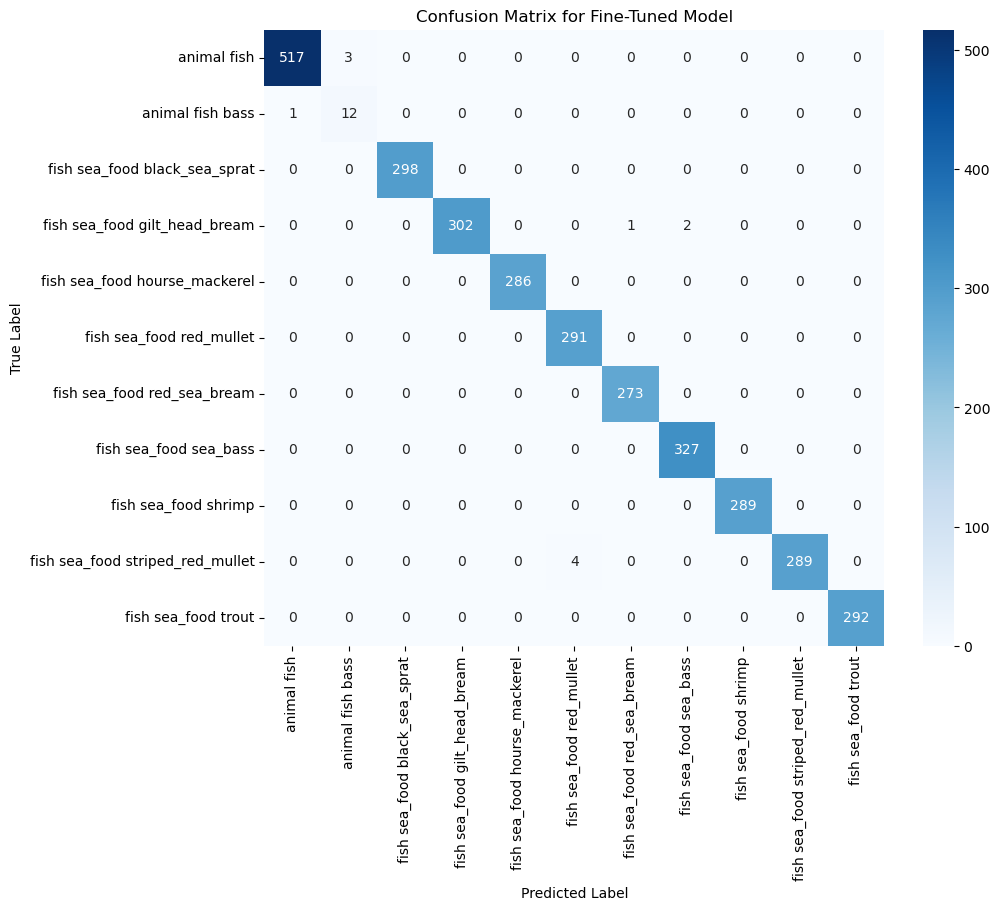

In [128]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Fine-Tuned Model")
plt.show()

# 4. Visualize Training History

In [141]:
# Retrieve training history
history = fine_tuned_model.history.history

In [143]:
history

{'accuracy': [0.9924498200416565,
  0.9950200915336609,
  0.9943774938583374,
  0.9969477653503418,
  0.9969477653503418],
 'loss': [0.02685563452541828,
  0.01853039860725403,
  0.019789405167102814,
  0.010924005880951881,
  0.009716139174997807],
 'val_accuracy': [0.9963369965553284,
  0.9945054650306702,
  0.9990842342376709,
  0.9990842342376709,
  0.9990842342376709],
 'val_loss': [0.007783680222928524,
  0.012197628617286682,
  0.002055258257314563,
  0.0015840015839785337,
  0.001991405850276351]}

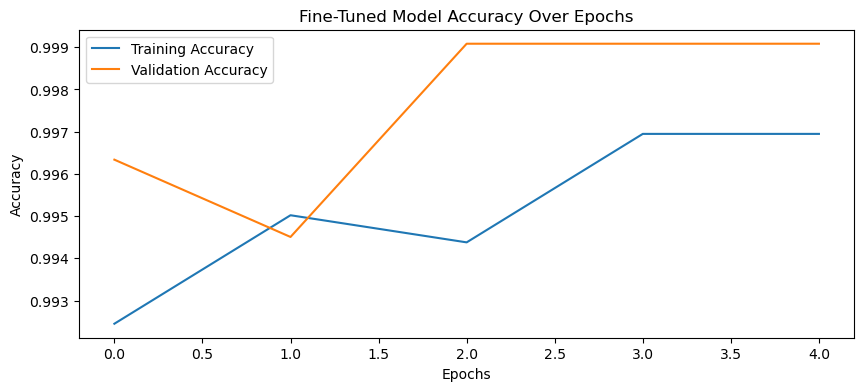

In [145]:
# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history['accuracy'], label="Training Accuracy")
plt.plot(history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Fine-Tuned Model Accuracy Over Epochs")
plt.show()

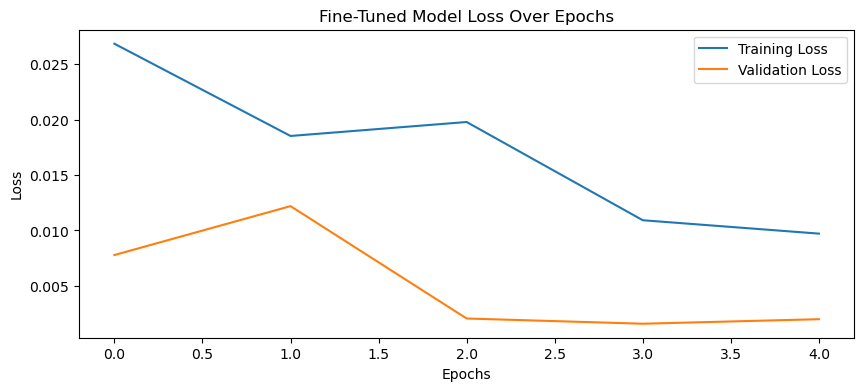

In [147]:
# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(history['loss'], label="Training Loss")
plt.plot(history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Fine-Tuned Model Loss Over Epochs")
plt.show()

# 5. Compare with Other Models

In [150]:
model_accuracies

{'VGG16': 0.9358974099159241,
 'ResNet50': 0.19505494832992554,
 'MobileNet': 0.9945054650306702,
 'InceptionV3': 0.958791196346283,
 'EfficientNetB0': 0.17124542593955994}

In [152]:
# Append fine-tuned model accuracy
fine_tuned_acc = history['val_accuracy'][-1]  # Last epoch validation accuracy
model_accuracies["Fine-Tuned Model"] = fine_tuned_acc

In [154]:
model_accuracies

{'VGG16': 0.9358974099159241,
 'ResNet50': 0.19505494832992554,
 'MobileNet': 0.9945054650306702,
 'InceptionV3': 0.958791196346283,
 'EfficientNetB0': 0.17124542593955994,
 'Fine-Tuned Model': 0.9990842342376709}

In [156]:
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Validation Accuracy'])

In [158]:
# Sort models based on accuracy
accuracy_df = accuracy_df.sort_values(by="Validation Accuracy", ascending=False)

In [160]:
accuracy_df

,Validation Accuracy
Fine-Tuned Model,0.999084
MobileNet,0.994505
InceptionV3,0.958791
VGG16,0.935897
ResNet50,0.195055
EfficientNetB0,0.171245


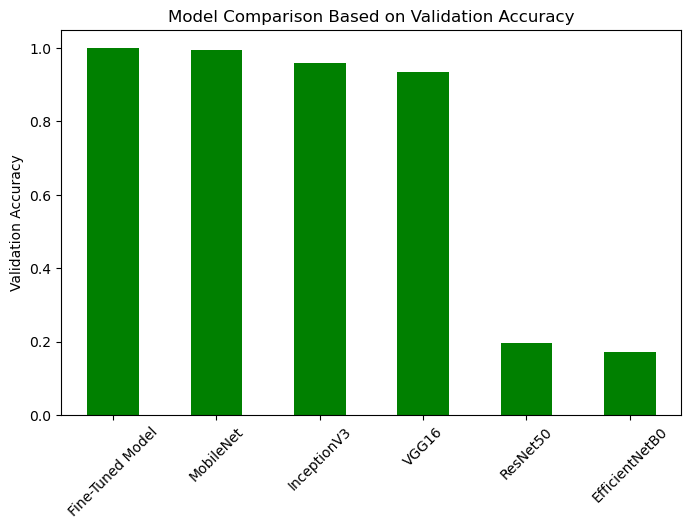

In [164]:
# Plot bar chart
accuracy_df.plot(kind='bar', legend=False, color='green', figsize=(8, 5))
plt.title("Model Comparison Based on Validation Accuracy")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.show()